In [1]:
import numpy as np
import pandas as pd

In [2]:
order_details=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [3]:
orders=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//orders.csv')
orders.head()

,order_id,date,time
0,1,01-01-2015,11:38:36
1,2,01-01-2015,11:57:40
2,3,01-01-2015,12:12:28
3,4,01-01-2015,12:16:31
4,5,01-01-2015,12:21:30


In [4]:
pizza_types=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizza_types.csv')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [5]:
pizzas=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizzas.csv')
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


##  CLEANING THE DATASET

### ORDER_DETAILS

In [6]:
# Check for missing values
order_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
missing_values=["N/a","na",np.nan]
order_details=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//order_details.csv',na_values=missing_values)

In [8]:
order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [9]:
# check for duplicate values
order_details.duplicated().sum()

0

In [10]:
order_details.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [11]:
# Handling outliers
from scipy import stats

# Identify and remove outliers using Z-scores (for a specific numeric column)
z_scores = stats.zscore(order_details['quantity'])
# Define a threshold for Z-scores beyond which data points are considered outliers
threshold = 3  

# Remove outliers
order_details[(z_scores < threshold)]


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


### ORDERS

In [12]:
# Check for missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [13]:
# Convert the 'date_time' column to datetime data type
orders['date'] = pd.to_datetime(orders['date'],format='%d-%m-%Y')

In [14]:
# Extract the day of the week and create a new column 'day_of_week'
orders['day_name'] = orders['date'].dt.day_name()

print(orders)

       order_id       date      time  day_name
0             1 2015-01-01  11:38:36  Thursday
1             2 2015-01-01  11:57:40  Thursday
2             3 2015-01-01  12:12:28  Thursday
3             4 2015-01-01  12:16:31  Thursday
4             5 2015-01-01  12:21:30  Thursday
...         ...        ...       ...       ...
21345     21346 2015-12-31  20:51:07  Thursday
21346     21347 2015-12-31  21:14:37  Thursday
21347     21348 2015-12-31  21:23:10  Thursday
21348     21349 2015-12-31  22:09:54  Thursday
21349     21350 2015-12-31  23:02:05  Thursday

[21350 rows x 4 columns]


In [15]:
# Create a new column 'month_column' containing only the month component
orders['month_column'] = orders['date'].dt.month
orders

,order_id,date,time,day_name,month_column
0,1,2015-01-01,11:38:36,Thursday,1
1,2,2015-01-01,11:57:40,Thursday,1
2,3,2015-01-01,12:12:28,Thursday,1
3,4,2015-01-01,12:16:31,Thursday,1
4,5,2015-01-01,12:21:30,Thursday,1
...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,Thursday,12
21346,21347,2015-12-31,21:14:37,Thursday,12
21347,21348,2015-12-31,21:23:10,Thursday,12
21348,21349,2015-12-31,22:09:54,Thursday,12


In [16]:
orders.isnull().sum()

order_id        0
date            0
time            0
day_name        0
month_column    0
dtype: int64

In [17]:
# check for duplicate values
orders.duplicated().sum()

0

In [18]:
orders.describe()

,order_id,date,month_column
count,21350.000000,21350,21350.000000
mean,10675.500000,2015-06-28 23:41:47.353630208,6.435035
min,1.000000,2015-01-01 00:00:00,1.000000
25%,5338.250000,2015-03-31 00:00:00,3.000000
50%,10675.500000,2015-06-28 00:00:00,6.000000
75%,16012.750000,2015-09-27 00:00:00,9.000000
max,21350.000000,2015-12-31 00:00:00,12.000000
std,6163.358459,NaN,3.425549


### PIZZA TYPES

In [19]:
# Check for missing values
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [20]:
missing_values=["N/a","na",np.nan]
pizza_types=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizza_types.csv',na_values=missing_values)

In [21]:
pizza_types.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [22]:
# check for duplicate values
pizza_types.duplicated().sum()

0

In [23]:
pizza_types.describe()

,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Supreme,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1


### PIZZAS

In [24]:
# Check for missing values
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [25]:
missing_values=["N/a","na",np.nan]
pizzas=pd.read_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizzas.csv',na_values=missing_values)

In [26]:
pizzas.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [27]:
# check for duplicate values
pizzas.duplicated().sum()

0

In [28]:
# Identify and remove rows where all columns are identical
pizzas = pizzas[~pizzas.duplicated()]
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [29]:
pizzas.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [30]:
# Export the DataFrame to a CSV file
order_details.to_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//order_details_cleaned.csv', index=False)

In [31]:
orders.to_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//orders_cleaned.csv', index=False)

In [32]:
pizza_types.to_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizza_types_cleaned.csv', index=False)

In [33]:
pizzas.to_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizzas_cleaned.csv', index=False)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt



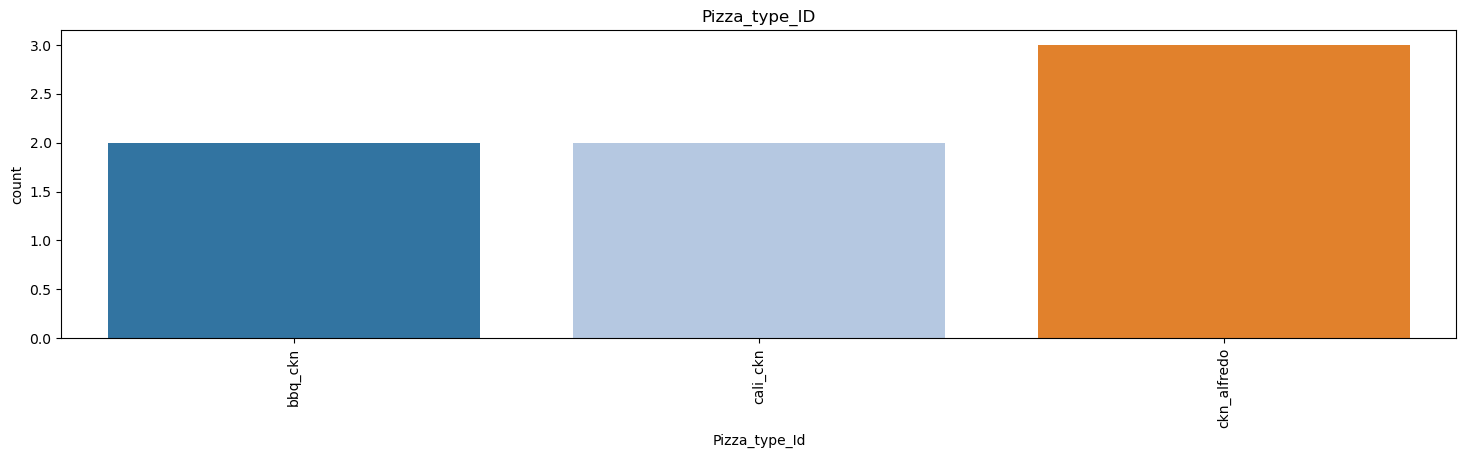

In [35]:
# Check for different'pizza_type_id' 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'pizza_type_id': ['bbq_ckn', 'cali_ckn', 'ckn_alfredo', 'bbq_ckn', 'ckn_alfredo', 'cali_ckn', 'ckn_alfredo'],
}

# Create a DataFrame
pizza = pd.DataFrame(data)
plt.figure(figsize=(18, 4))
colors = sns.color_palette("tab20", n_colors=len(pizzas['pizza_type_id'].unique()))
sns.countplot(data=pizza, x="pizza_type_id", palette=colors)
plt.xticks(rotation=90)
plt.xlabel("Pizza_type_Id", fontsize=10, color="black")
plt.title("Pizza_type_ID", color="black")
plt.show()



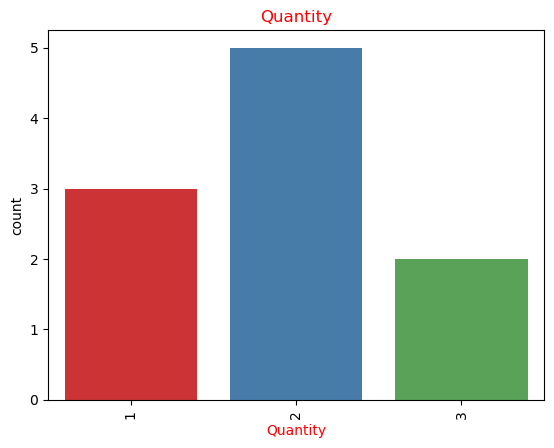

In [36]:
#For checking quantity
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'quantity': [1, 2, 2, 3, 1, 2, 3, 1, 2, 2],
}

# Create a DataFrame
df = pd.DataFrame(data)
sns.countplot(data=df, x="quantity", palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Quantity", fontsize=10, color="red")
plt.title("Quantity", color="red")
plt.show()

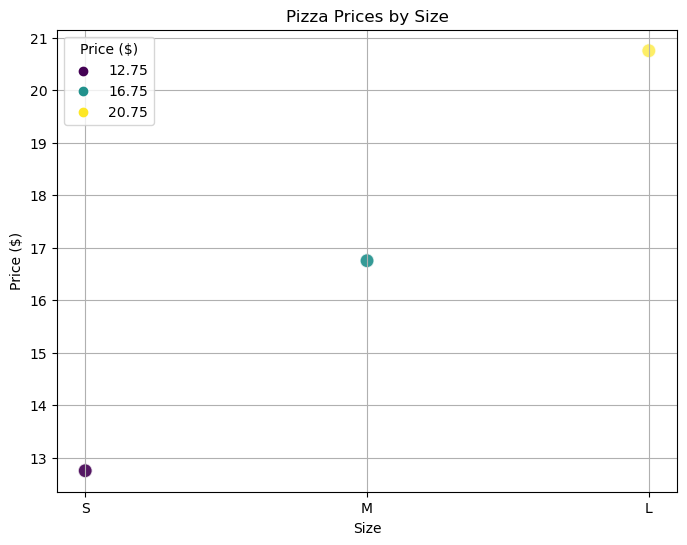

In [37]:
#Prices according to sizes
import seaborn as sns
import matplotlib.pyplot as plt
sizes = ["S", "M", "L", "S", "M"]
prices = [12.75, 16.75, 20.75, 12.75, 16.75]

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sizes, y=prices, hue=prices, palette="viridis", s=100, alpha=0.7)
plt.xlabel("Size")
plt.ylabel("Price ($)")
plt.title("Pizza Prices by Size")

# Show the plot
plt.grid(True)
plt.legend().set_title("Price ($)")
plt.show()



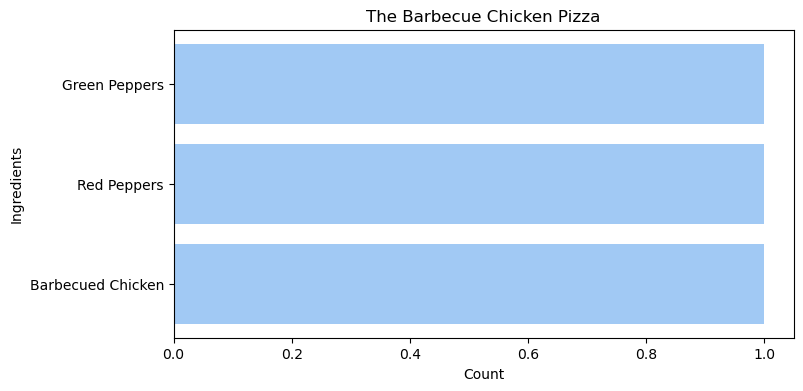

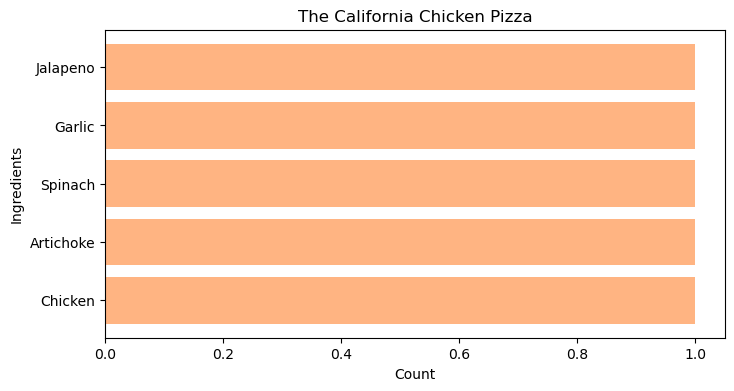

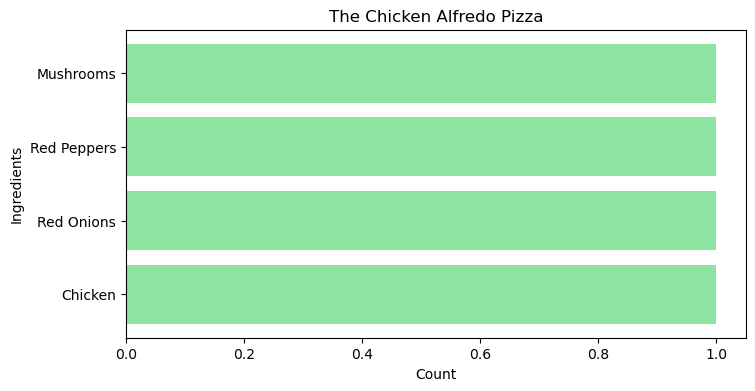

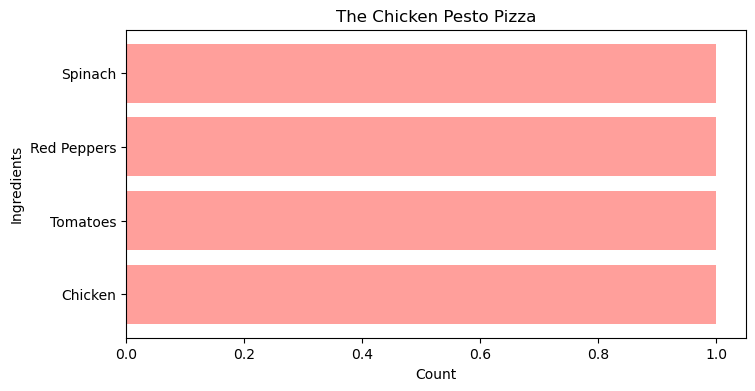

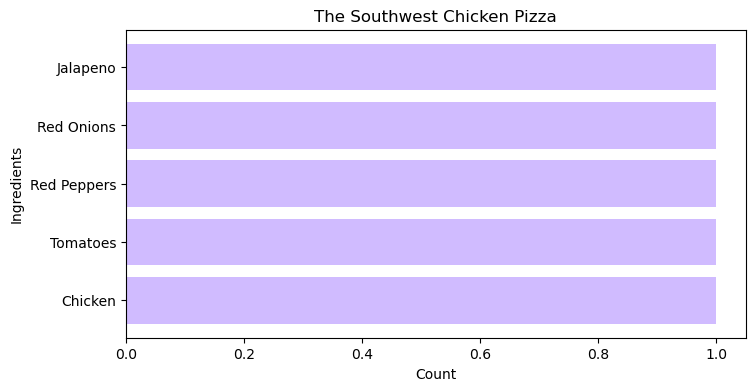

In [38]:
#Ingredients with all pizza
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'pizza_type_id': ['bbq_ckn', 'cali_ckn', 'ckn_alfredo', 'ckn_pesto', 'southw_ckn'],
    'name': ['The Barbecue Chicken Pizza', 'The California Chicken Pizza', 'The Chicken Alfredo Pizza', 'The Chicken Pesto Pizza', 'The Southwest Chicken Pizza'],
    'category': ['Chicken', 'Chicken', 'Chicken', 'Chicken', 'Chicken'],
    'ingredients': [
        'Barbecued Chicken, Red Peppers, Green Peppers',
        'Chicken, Artichoke, Spinach, Garlic, Jalapeno',
        'Chicken, Red Onions, Red Peppers, Mushrooms',
        'Chicken, Tomatoes, Red Peppers, Spinach',
        'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

if all(col in df.columns for col in ['ingredients', 'name']):
    # Split the ingredients string into a list for each pizza
    df['ingredients_list'] = df['ingredients'].str.split(', ')

    # Define a light color palette
    light_palette = sns.color_palette("pastel", n_colors=len(df))

    # Create individual bar charts for each pizza with light colors
    for index, row in df.iterrows():
        plt.figure(figsize=(8, 4))
        plt.barh(row['ingredients_list'], [1] * len(row['ingredients_list']), color=light_palette[index])
        plt.title(row['name'])
        plt.xlabel('Count')
        plt.ylabel('Ingredients')
        plt.show()


## CREATE DATABASE AND TABLES

In [39]:
import sqlite3

In [40]:
conn = sqlite3.connect("D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//pizzasalesdb.db")
cur=conn.cursor()

In [41]:
## CREATE order_details TABLE
order_details.to_sql("order_details", conn, if_exists= "replace", index=False)

48620

In [42]:
## CREATE orders TABLE
orders.to_sql("orders",conn,if_exists="replace",index=False)

21350

In [43]:
## CREATE pizza_types TABLE
pizza_types.to_sql("pizza_types",conn,if_exists="replace",index=False)

32

In [44]:
## CREATE pizzas TABLE
pizzas.to_sql("pizzas",conn,if_exists="replace",index=False)

96

## 1.What is the total pizza sales quantity for each month over the past year, and can you identify any seasonal trends or patterns in the data?

In [45]:
cur.execute(
"""SELECT month_column AS month, SUM(order_id) AS total_quantity
FROM orders
GROUP BY month_column
ORDER BY month_column""");
# Fetch the result
result = cur.fetchall()
result 



[(1, 1702935),
 (2, 4529280),
 (3, 8188920),
 (4, 11279730),
 (5, 15001888),
 (6, 17568657),
 (7, 22761405),
 (8, 25131491),
 (9, 25582722),
 (10, 28073353),
 (11, 33643904),
 (12, 34457640)]

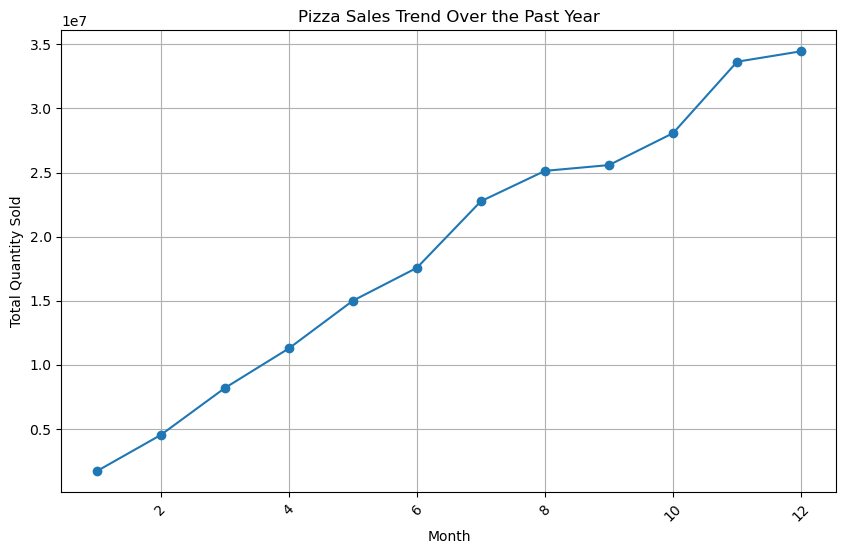

In [46]:
# Convert the SQL result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['month', 'total_quantity'])

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['total_quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Pizza Sales Trend Over the Past Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.show()

It is showing increasing trend. The sales were increasing month to month nad in last month , sold quantity was reached at peak point.


## 2.What is the average daily pizza sales quantity for each day of the week (e.g., Monday, Tuesday, etc.), and how does it vary over time?

In [47]:
cur.execute(
"""
SELECT o.day_name AS day_of_week, AVG(od.quantity) AS avg_pizza_sales
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
GROUP BY o.day_name
ORDER BY o.day_name
""")
# Fetch the result
result = cur.fetchall()
result 

[('Friday', 1.0167776955341723),
 ('Monday', 1.0182132202857592),
 ('Saturday', 1.0187627464309994),
 ('Sunday', 1.019942538448538),
 ('Thursday', 1.0211661887204697),
 ('Tuesday', 1.0210276913964165),
 ('Wednesday', 1.0219214359276152)]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

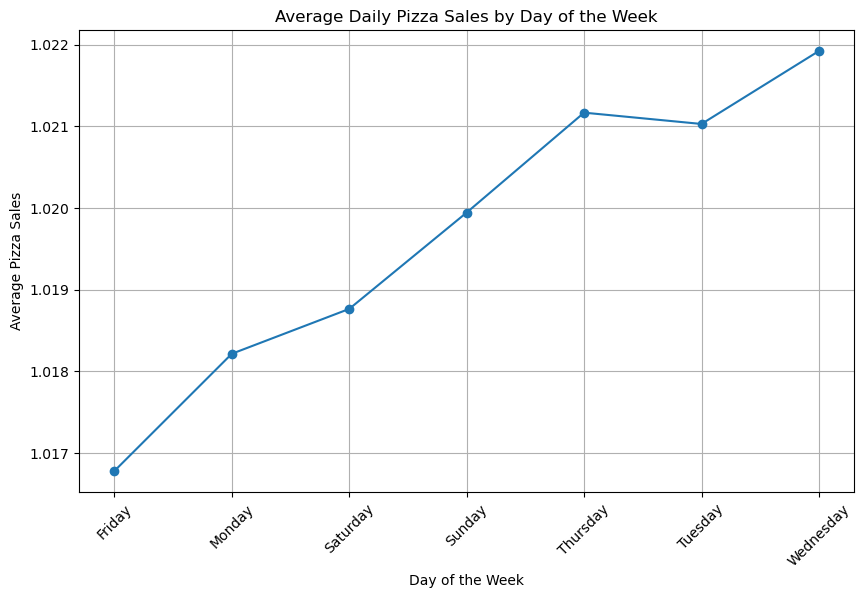

In [48]:
# Convert the SQL result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['day_of_week', 'avg_pizza_sales'])
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['day_of_week'], df['avg_pizza_sales'], marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pizza Sales')
plt.title('Average Daily Pizza Sales by Day of the Week')
plt.grid(True)
plt.xticks(rotation=45)



### On tuesday, wednesday, thursday, pizzas were mostly sold as compare to weekends. Its highest sale quantity was seen on wednesday.

##  3.What is the month-to-month growth rate in pizza sales quantity, and can you identify any periods of significant growth or decline?

In [49]:
cur.execute(
"""WITH MonthlySales AS (
SELECT o.month_column AS month, AVG(od.quantity) AS total_sales
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
GROUP BY o.month_column
ORDER BY o.month_column 
)
SELECT
    month,
    total_sales,
    LAG(total_sales) OVER (ORDER BY month) AS previous_month_sales,
    CASE
        WHEN LAG(total_sales) OVER (ORDER BY month) IS NULL THEN 0
        ELSE (total_sales - LAG(total_sales) OVER (ORDER BY month)) / LAG(total_sales) OVER (ORDER BY month)
    END AS growth_rate
FROM
    MonthlySales
ORDER BY
    month
""");

# Fetch the results
results = cur.fetchall()
results
# Display the results
for row in results:
    print(row)



(1, 1.0182868142444659, None, 0)
(2, 1.0177286742034943, 1.0182868142444659, -0.000548116732107216)
(3, 1.0179168657429527, 1.0177286742034943, 0.0001849132722978996)
(4, 1.0206540447504302, 1.0179168657429527, 0.0026890005457171563)
(5, 1.0209955178108043, 1.0206540447504302, 0.0003345629815807255)
(6, 1.0203726708074534, 1.0209955178108043, -0.0006100389203337613)
(7, 1.0211578702627295, 1.0203726708074534, 0.0007695222321612705)
(8, 1.018075232046898, 1.0211578702627295, -0.0030187675242011563)
(9, 1.0185912542550406, 1.018075232046898, 0.0005068605854452693)
(10, 1.022649460100079, 1.0185912542550406, 0.003984135764062185)
(11, 1.0193548387096774, 1.022649460100079, -0.0032216526962027523)
(12, 1.019694221300855, 1.0193548387096774, 0.0003329386179275073)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

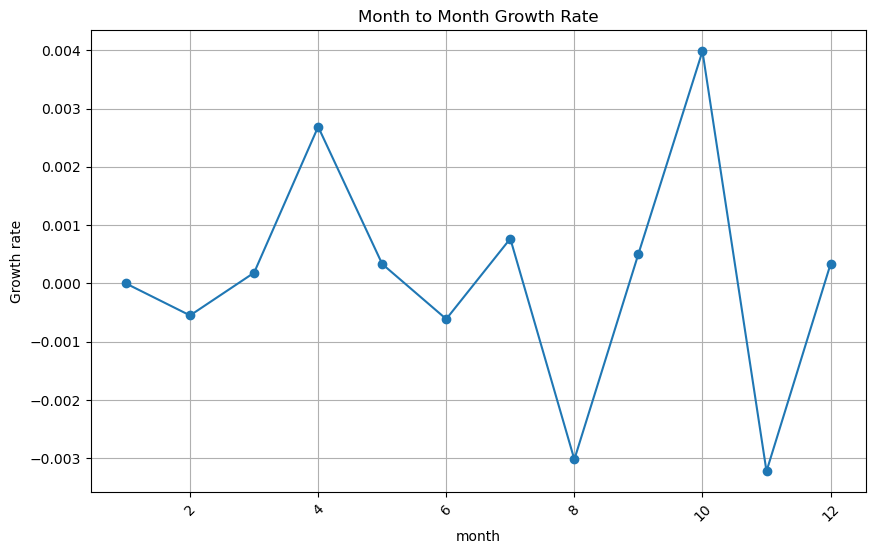

In [50]:
# Convert the SQL result to a Pandas DataFrame
df = pd.DataFrame(results, columns=['month', 'total_sales', 'previous_month_sales', 'growth_rate'])[['month', 'growth_rate']]
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['growth_rate'], marker='o')
plt.xlabel('month')
plt.ylabel('Growth rate')
plt.title('Month to Month Growth Rate')
plt.grid(True)
plt.xticks(rotation=45)


## 4. What are the top N pizza types ordered by customers?

In [51]:
cur.execute(
"""WITH PizzaSales AS (
        SELECT
            pt.name AS pizza_types,
            SUM(od.quantity) AS total_sales
        FROM
            order_details od
        JOIN
            pizzas pz ON od.pizza_id = pz.pizza_id
        JOIN
            pizza_types pt ON pz.pizza_type_id = pt.pizza_type_id
        GROUP BY
            pt.name
        ORDER BY
            total_sales DESC
        LIMIT 20 -- Replace N with the desired number of top pizza types/sizes
    )
    SELECT
        pizza_types,
        total_sales
    FROM
        PizzaSales
""");
# Fetch the results
results = cur.fetchall()
results





[('The Classic Deluxe Pizza', 2453),
 ('The Barbecue Chicken Pizza', 2432),
 ('The Hawaiian Pizza', 2422),
 ('The Pepperoni Pizza', 2418),
 ('The Thai Chicken Pizza', 2371),
 ('The California Chicken Pizza', 2370),
 ('The Sicilian Pizza', 1938),
 ('The Spicy Italian Pizza', 1924),
 ('The Southwest Chicken Pizza', 1917),
 ('The Big Meat Pizza', 1914),
 ('The Four Cheese Pizza', 1902),
 ('The Italian Supreme Pizza', 1884),
 ('The Vegetables + Vegetables Pizza', 1526),
 ('The Mexicana Pizza', 1484),
 ('The Napolitana Pizza', 1464),
 ('The Prosciutto and Arugula Pizza', 1457),
 ('The Spinach and Feta Pizza', 1446),
 ('The Pepper Salami Pizza', 1446),
 ('The Italian Capocollo Pizza', 1438),
 ('The Greek Pizza', 1420)]

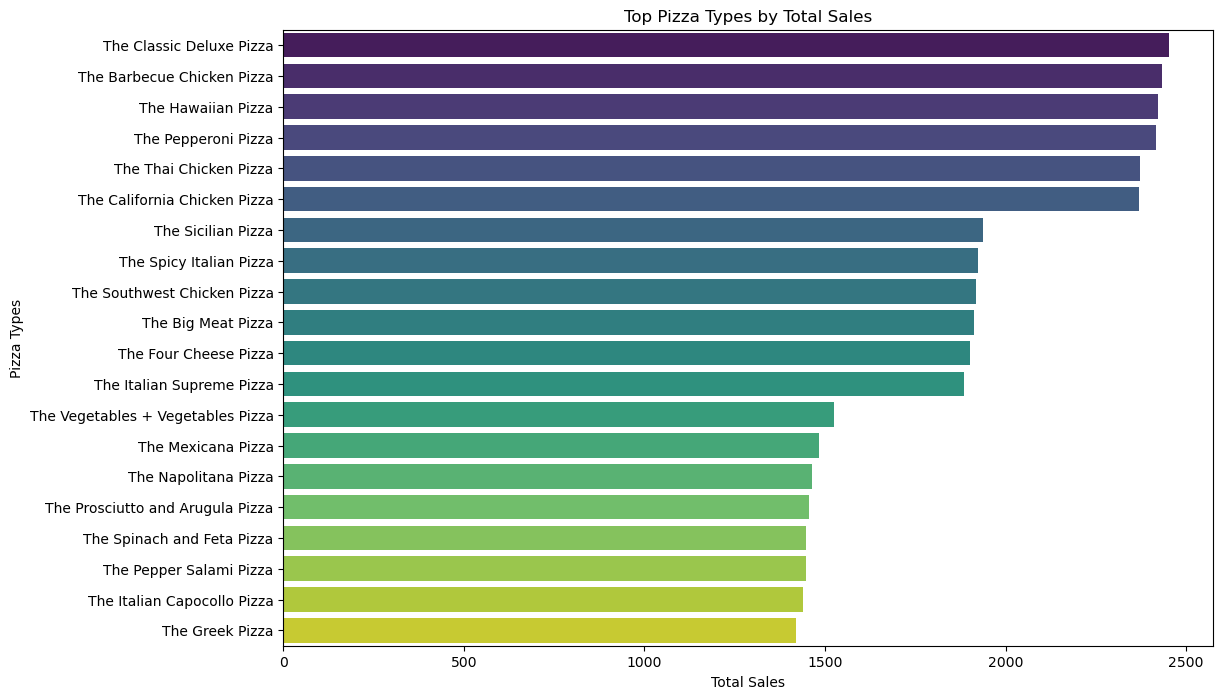

In [52]:
df = pd.DataFrame(results, columns=['pizza_types', 'total_sales'])

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='pizza_types', data=df, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Types')
plt.title('Top Pizza Types by Total Sales')
plt.show()


### 5.Are there any significant differences in pizza sales on holidays or special events compared to regular days, and can you quantify these differences?

In [53]:
cur.execute(
"""WITH HolidayDates AS(
    VALUES ('2015-01-01 00:00:00'), ('2015-01-19 00:00:00'), ('2015-02-16 00:00:00'), ('2015-05-25 00:00:00'), ('2015-07-03 00:00:00'),
           ('2015-07-04 00:00:00'), ('2015-09-07 00:00:00'), ('2015-10-12 00:00:00'), ('2015-11-11 00:00:00'), ('2015-11-26 00:00:00'), ('2015-12-25 00:00:00')
),
RegularDates AS (
    SELECT DISTINCT date
    FROM orders
    ORDER BY RANDOM()
    LIMIT 11
)

SELECT
    CASE
        WHEN o.date IN (SELECT * FROM HolidayDates) THEN 'Holiday'
        ELSE 'Regular Day'
    END AS day_category,
    SUM(od.quantity) AS total_sales
FROM
    orders o
JOIN
    order_details od ON o.order_id = od.order_id
JOIN
    RegularDates rd ON o.date = rd.date
OR
    o.date IN (SELECT * FROM HolidayDates)
GROUP BY
    day_category
""");
# Fetch the results
results = cur.fetchall()
results


[('Holiday', 16709), ('Regular Day', 1437)]

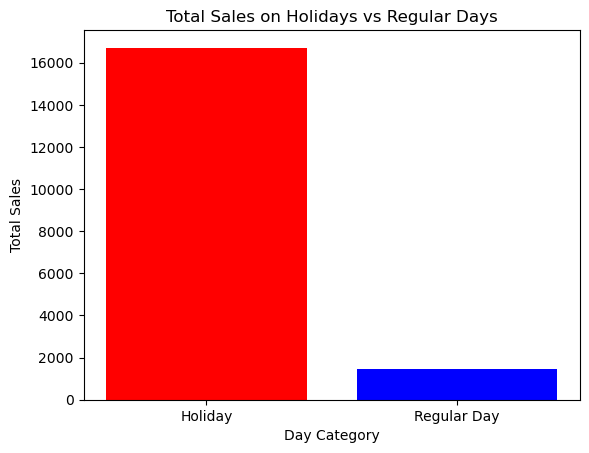

In [54]:


# Extracting data for visualization
categories, total_sales = zip(*results)

# Creating a bar chart
plt.bar(categories, total_sales, color=['red', 'blue'])
plt.xlabel('Day Category')
plt.ylabel('Total Sales')
plt.title('Total Sales on Holidays vs Regular Days')
plt.show()

## 6. How has the average pizza order quantity changed over time (e.g.,by morning,afternoon,evening,night)?

In [55]:
cur.execute(
"""SELECT
    CASE
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 0 AND 11 THEN 'Morning'
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 12 AND 16 THEN 'Afternoon'
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 17 AND 19 THEN 'Evening'
        WHEN CAST(SUBSTR(time, 1, 2) AS INTEGER) BETWEEN 20 AND 23 THEN 'Night'
    END AS time_period,
    SUM(od.quantity) AS total_sales
FROM
    orders o
JOIN
    order_details od ON o.order_id = od.order_id
GROUP BY
    time_period
ORDER BY
    time_period;

""");
# Fetch the results
results = cur.fetchall()
results


[('Afternoon', 24257), ('Evening', 15034), ('Morning', 2750), ('Night', 7533)]

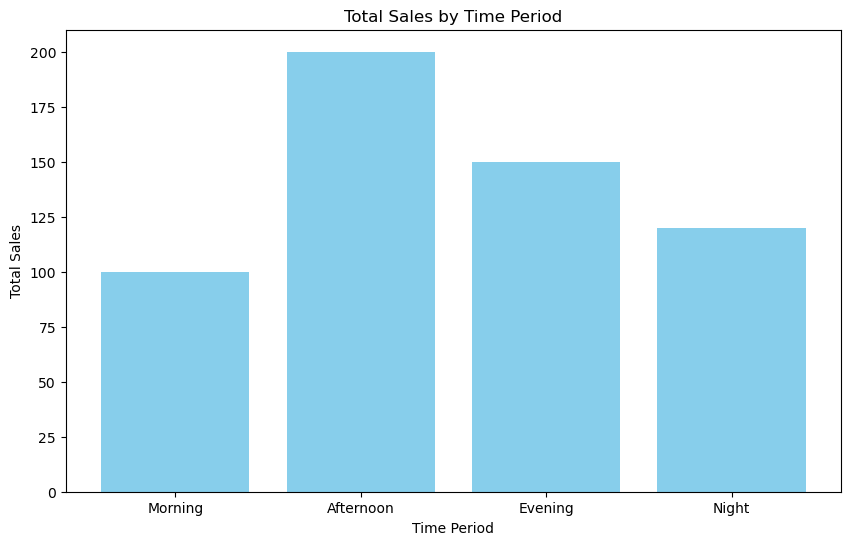

In [56]:
# Adjust column names accordingly
columns = ['time_period', 'total_sales']
data = [('Morning', 100), ('Afternoon', 200), ('Evening', 150), ('Night', 120)]  # Replace with your actual data

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['time_period'], df['total_sales'], color='skyblue')
plt.xlabel('Time Period')
plt.ylabel('Total Sales')
plt.title('Total Sales by Time Period')
plt.show()

In [57]:
import pandas as pd

# Assuming you have DataFrames named orders, order_details, pizzas, and pizza_types

# Merge orders with order_details on 'order_id'
merged_data = pd.merge(orders, order_details, on='order_id')

# Merge merged_data with pizzas on 'pizza_id'
merged_data = pd.merge(merged_data, pizzas, on='pizza_id')

# Merge merged_data with pizza_types on 'pizza_type_id'
merged_data = pd.merge(merged_data, pizza_types, on='pizza_type_id')



In [58]:
# Select columns of interest
result_data = merged_data[[ 'date','price','quantity']]

# Display the result or perform further analysis
print(result_data)


            date  price  quantity
0     2015-01-01  13.25         1
1     2015-01-02  13.25         1
2     2015-01-03  13.25         1
3     2015-01-03  13.25         1
4     2015-01-04  13.25         1
...          ...    ...       ...
48615 2015-12-27  23.65         1
48616 2015-12-28  23.65         1
48617 2015-12-29  23.65         1
48618 2015-12-31  23.65         1
48619 2015-12-31  23.65         1

[48620 rows x 3 columns]


In [59]:
# Group by date and sum the sales
df = result_data.groupby('date')[['quantity', 'price']].sum().reset_index()
df

,date,quantity,price
0,2015-01-01,162,2697.85
1,2015-01-02,165,2643.15
2,2015-01-03,158,2596.15
3,2015-01-04,106,1755.45
4,2015-01-05,125,1994.95
...,...,...,...
353,2015-12-27,89,1389.05
354,2015-12-28,102,1637.20
355,2015-12-29,80,1312.50
356,2015-12-30,82,1201.65


In [60]:
df = df.rename(columns={'price':'sales'})
df

,date,quantity,sales
0,2015-01-01,162,2697.85
1,2015-01-02,165,2643.15
2,2015-01-03,158,2596.15
3,2015-01-04,106,1755.45
4,2015-01-05,125,1994.95
...,...,...,...
353,2015-12-27,89,1389.05
354,2015-12-28,102,1637.20
355,2015-12-29,80,1312.50
356,2015-12-30,82,1201.65


In [61]:
# Assuming 'quantity' is the column you want to remove
df = df.drop(columns=['quantity'])
df

,date,sales
0,2015-01-01,2697.85
1,2015-01-02,2643.15
2,2015-01-03,2596.15
3,2015-01-04,1755.45
4,2015-01-05,1994.95
...,...,...
353,2015-12-27,1389.05
354,2015-12-28,1637.20
355,2015-12-29,1312.50
356,2015-12-30,1201.65


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt


In [63]:
# Make sure 'date' is in datetime format

df.set_index('date', inplace=True)

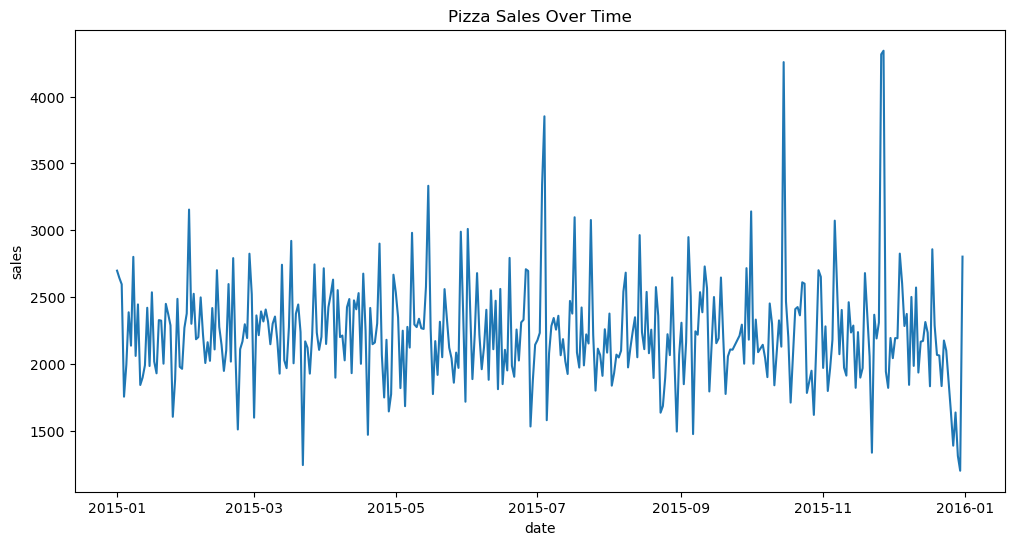

In [64]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['sales'])
plt.title('Pizza Sales Over Time')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

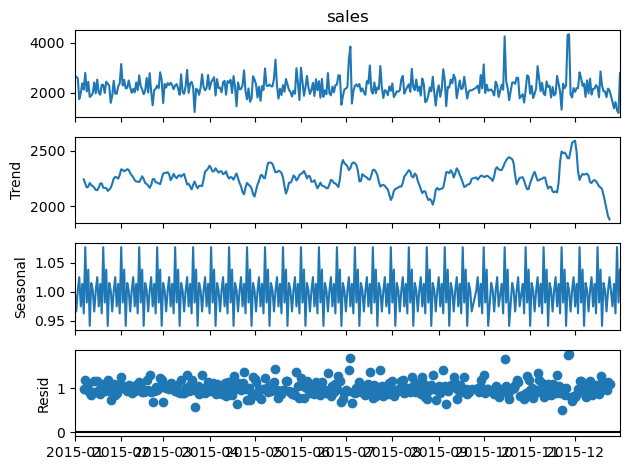

In [65]:
# Decompose the time series data to identify trends and seasonality
result = seasonal_decompose(df['sales'], model='multiplicative', period=12)
result.plot()
plt.show()

In [66]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
def check_stationarity(time_series):
    # Perform Dickey-Fuller test
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Call the function
check_stationarity(df['sales'])

ADF Statistic: -5.253507653355056
p-value: 6.830009264485405e-06
Critical Values: {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}


In [67]:
# DIFFERENCE
df['sales_diff'] = df['sales'].diff().dropna()
df['sales_diff']

date
2015-01-01        NaN
2015-01-02     -54.70
2015-01-03     -47.00
2015-01-04    -840.70
2015-01-05     239.50
               ...   
2015-12-27    -254.00
2015-12-28     248.15
2015-12-29    -324.70
2015-12-30    -110.85
2015-12-31    1601.10
Name: sales_diff, Length: 358, dtype: float64

In [68]:
# Check for missing or infinite values
print(df.isna().sum())  # To check missing values
print(df.isin([np.nan, np.inf, -np.inf]).sum())  # To check for NaN or Inf values

# To handle missing values by removing rows
df= df.dropna()  # Remove rows with missing values

# To handle infinite values by replacing them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

sales         0
sales_diff    1
dtype: int64
sales         0
sales_diff    1
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_31392\3740792992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [69]:
check_stationarity(df['sales_diff'])

ADF Statistic: -7.765584622707661
p-value: 9.20703770167317e-12
Critical Values: {'1%': -3.4497304638968043, '5%': -2.8700785273763487, '10%': -2.571319005190311}


In [70]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]


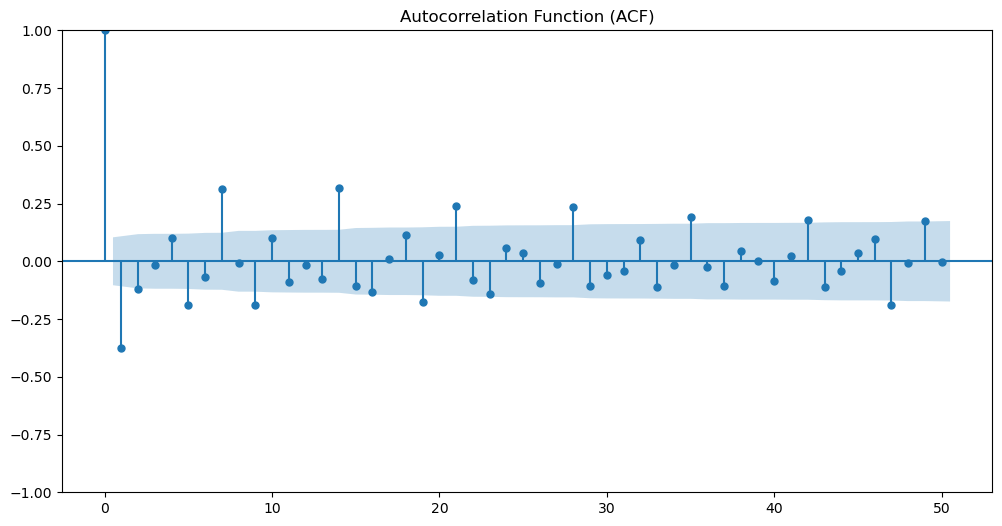

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your time series data is in the 'sales' column of the DataFrame df
sales_data = df['sales_diff']

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(sales_data, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()




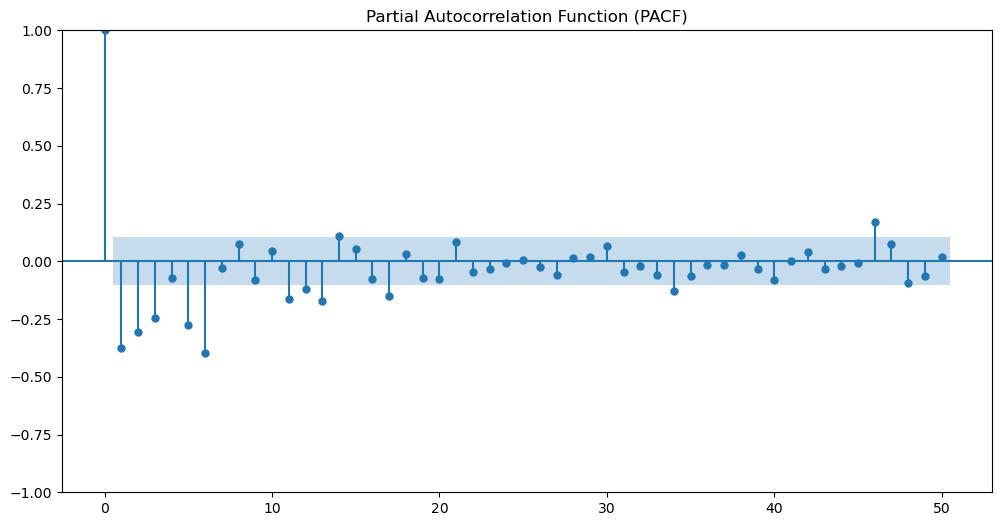

In [72]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(sales_data, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [73]:
# Specify the number of steps to forecast
forecast_steps = len(test)

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=df.index.max(), periods=forecast_steps + 1, freq='M')[1:]


In [74]:
# Build and train SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [75]:
# Predict the next month sales
forecast = model_fit.get_forecast(steps=len(test))
predicted_sales = forecast.predicted_mean
predicted_sales

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


285    2118.363228
286    2239.552525
287    2217.616153
288    2261.176399
289    2250.020703
          ...     
352    2326.658547
353    2194.305960
354    2501.724289
355    2207.156253
356    2313.761189
Name: predicted_mean, Length: 72, dtype: float64

In [76]:
# Evaluate the model
rmse = sqrt(mean_squared_error(test, predicted_sales))
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 530.8205300645749


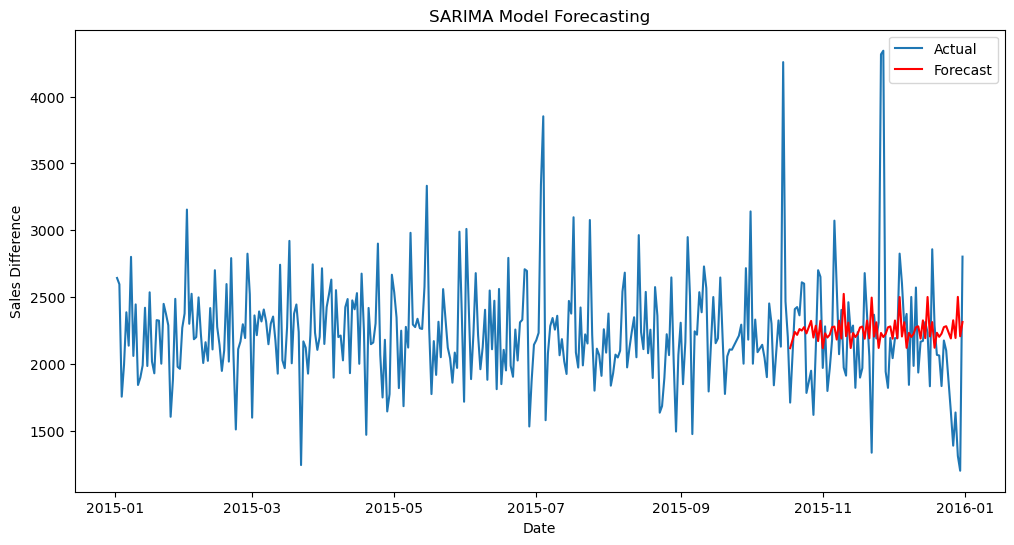

In [77]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Actual')
plt.plot(test.index, predicted_sales, label='Forecast', color='red')
plt.title('SARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.legend()
plt.show()


In [78]:

# Create a DataFrame with the forecasted sales and corresponding dates
forecast_df = pd.DataFrame({'date': forecast_dates, 'predicted_sales': predicted_sales})
forecast_df

,date,predicted_sales
285,2016-01-31,2118.363228
286,2016-02-29,2239.552525
287,2016-03-31,2217.616153
288,2016-04-30,2261.176399
289,2016-05-31,2250.020703
...,...,...
352,2021-08-31,2326.658547
353,2021-09-30,2194.305960
354,2021-10-31,2501.724289
355,2021-11-30,2207.156253


In [80]:
# Export the result DataFrame to a CSV file
forecast_df.to_csv('D://data analytics sem 4//DAB 401 FINANCIAL ANALYTICS//project//forcast.csv', index=False)
